In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import genextreme as gev
import netCDF4 as nc
import copy

In [2]:
#Data Source
url = "https://cds.climate.copernicus.eu/cdsapp#!/dataset/insitu-gridded-observations-global-and-regional?tab=overview"

In [3]:
#Importing data from NC file
max_temp_nc = 'C:/Users/Shubham/Desktop/Projects/Return_Period_of_Extreme_Events/dataset-insitu-gridded-observations-global-and-regional-1f95b6dc-dcd1-4b3d-b20d-e476a0045f23/CRU_maximum_temperature_mon_1x1_global_2019_v4.03.nc'
min_temp_nc = 'C:/Users/Shubham/Desktop/Projects/Return_Period_of_Extreme_Events/dataset-insitu-gridded-observations-global-and-regional-1f95b6dc-dcd1-4b3d-b20d-e476a0045f23/CRU_minimum_temperature_mon_1x1_global_2019_v4.03.nc'
max_prec_nc = 'C:/Users/Shubham/Desktop/Projects/Return_Period_of_Extreme_Events/dataset-insitu-gridded-observations-global-and-regional-1f95b6dc-dcd1-4b3d-b20d-e476a0045f23/CRU_total_precipitation_mon_1x1_global_1951_v4.03.nc'


In [4]:
#Getting variables in NC files
ds1 = nc.Dataset(max_temp_nc)
ds2 = nc.Dataset(min_temp_nc)
ds3 = nc.Dataset(max_prec_nc)


In [5]:
#Getting names of the variables
for dim in ds1.variables.values():
    print(dim)
    
for dim in ds2.variables.values():
    print(dim)
    
for dim in ds3.variables.values():
    print(dim)
    

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    long_name: time
    units: days since 1901-01-01 00:00:00
    calendar: gregorian
    axis: T
unlimited dimensions: time
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 tasmax(time, lat, lon)
    standard_name: air_temperature
    long_name: maximum monthly near-surface temperature
    units: degrees Celsius
    _FillValue: 3e+33
    mis

In [7]:
#Getting all data from 1950 to 2019
#creating file names
start_max_temp = max_temp_nc[:198]
end_max_temp = max_temp_nc[202:]

start_min_temp = min_temp_nc[:198]
end_min_temp = min_temp_nc[202:]

start_max_prec = max_prec_nc[:198]
end_max_prec = max_prec_nc[202:]

#Empty list to store data
max_temp_all = []
min_temp_all = []
max_prec_all = []

for year in range(1950, 2020):
    fn1=start_max_temp+str(year)+end_max_temp
    ds1=nc.Dataset(fn1)
    fn2=start_min_temp+str(year)+end_min_temp
    ds2=nc.Dataset(fn2)
    fn3=start_max_prec+str(year)+end_max_prec
    ds3=nc.Dataset(fn3)
    #unmasking values
    for k in ds1.variables:
        ds1.variables[k].set_auto_mask(False)
    for k in ds2.variables:
        ds2.variables[k].set_auto_mask(False)
    for k in ds3.variables:
        ds3.variables[k].set_auto_mask(False)
    #getting monthly extremes 
    x1 = np.array(ds1['tasmax'])
    x2 = np.array(ds2['tasmin'])
    x3 = np.array(ds3['pr'])
    #Getting annual extremes
    max_temp = np.max(x1, axis=0)
    min_temp = np.min(x2, axis=0)
    max_prec = np.max(x3, axis=0)
    #appending values
    max_temp_all.append(max_temp)
    min_temp_all.append(min_temp)
    max_prec_all.append(max_prec)

In [8]:
#converting the lists to numpy array
max_temp_all = np.array(max_temp_all)
min_temp_all = np.array(min_temp_all)
max_prec_all = np.array(max_prec_all)

In [9]:
#Calculating return period using GEV and CDF
return_period_max_temp=[]
return_period_min_temp=[]
return_period_max_prec=[]

#1950-1999 data to fit the GEV distribution
for lat in range(180):
    for lon in range(360):
        params1 = gev.fit(max_temp_all[:50, lat, lon])
        params2 = gev.fit(min_temp_all[:50, lat, lon])
        params3 = gev.fit(max_prec_all[:50, lat, lon])
        cdf1 = gev.cdf(max_temp_all[50:, lat, lon], params1[2], params1[0], params1[1])
        cdf2 = gev.cdf(min_temp_all[50:, lat, lon], params2[2], params2[0], params2[1])
        cdf3 = gev.cdf(max_prec_all[50:, lat, lon], params3[2], params3[0], params3[1])
        rp_max_temp = 1/(1-cdf1)
        rp_min_temp = 1/cdf2
        rp_max_prec = 1/(1-cdf3)
        return_period_max_temp.append(rp_max_temp) 
        return_period_min_temp.append(rp_min_temp)
        return_period_max_prec.append(rp_max_prec)

c:\Users\Shubham\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:398: RuntimeWarning: overflow encountered in square
  m2 = ((data - mu)**2).mean()
c:\Users\Shubham\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:399: RuntimeWarning: overflow encountered in power
  m3 = ((data - mu)**3).mean()
c:\Users\Shubham\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:400: RuntimeWarning: invalid value encountered in true_divide
  return m3 / np.power(m2, 1.5)
c:\Users\Shubham\anaconda3\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Shubham\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2428: RuntimeWarning: invalid value encountered in true_divide
  Shat = sqrt(mu2hat / mu2)
<ipython-input-9-d0a528bc2d66>:15: RuntimeWarning: divide by zero encountered in true_divide
  rp_max_temp = 1/(1-cdf1)
<ipython-input-9-d0a528bc2d66>:17: RuntimeWarning

In [16]:
#Saving the Generated Data
dict = {'return_period_max_temp' : return_period_max_temp,'return_period_min_temp' : return_period_min_temp,'return_period_max_prec' : return_period_max_prec}
df = pd.DataFrame(dict)
df.to_csv('return_periods.csv')

In [22]:
#loading and reshaping the data
rp_tmax = np.array(copy.deepcopy(return_period_max_temp))
rp_tmin = np.array(copy.deepcopy(return_period_min_temp))
rp_pmax = np.array(copy.deepcopy(return_period_max_prec))

rp_tmax = rp_tmax.reshape((180,360,20))
rp_tmin = rp_tmin.reshape((180,360,20))
rp_pmax = rp_pmax.reshape((180,360,20))

In [24]:
#Calculating frequency of return periods when it is more than 100 years during 2000-2019 for all three parameters
data1 = np.random.random((180,360))
data2 = np.random.random((180,360))
data3 = np.random.random((180,360))
for i in range(180):
    for j in range(360):
        data1[i][j]=len(np.where(rp_tmax[i][j]>=100)[0])
        data2[i][j]=len(np.where(rp_tmin[i][j]>=100)[0])
        data3[i][j]=len(np.where(rp_pmax[i][j]>=100)[0])

<ipython-input-25-4cc899443a59>:7: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  pixel_plot.add_axes()


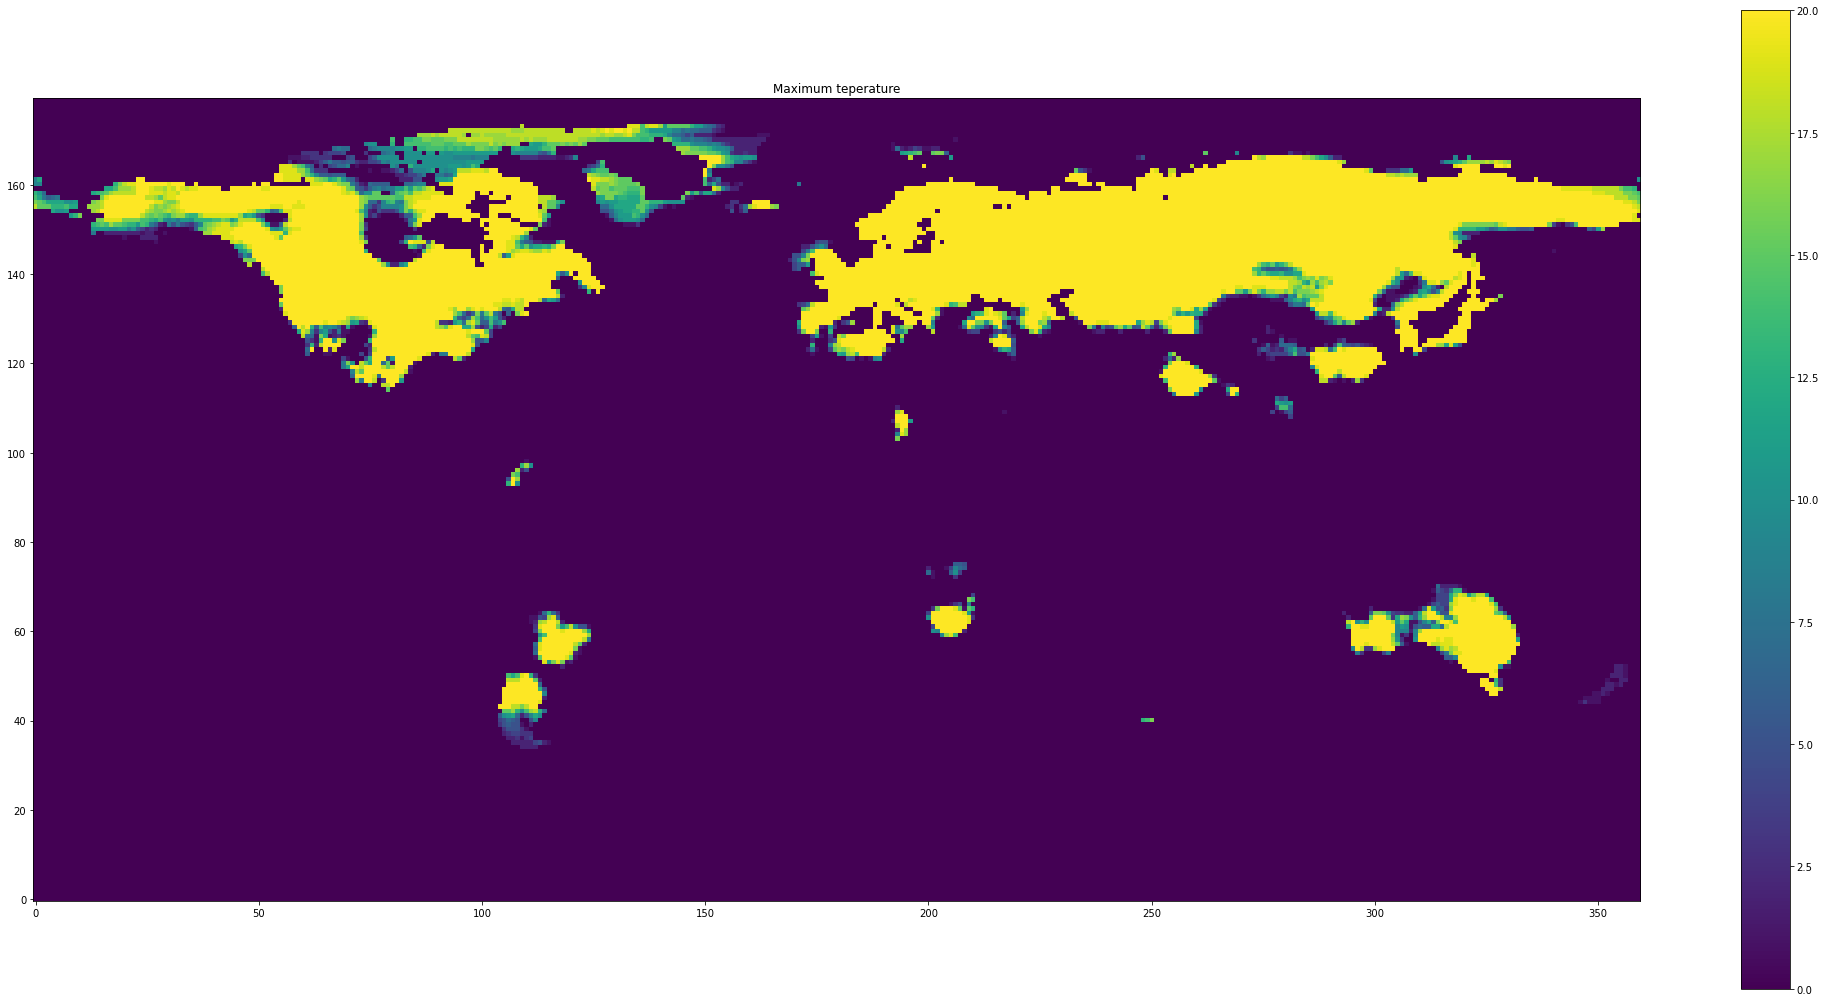

In [25]:
#ploting the data on map
pixel_plot = plt.figure()
pixel_plot.set_figwidth(36)
pixel_plot.set_figheight(18)
  
# plotting a plot
pixel_plot.add_axes()
  
# customizing plot
plt.title("Maximum teperature")
pixel_plot = plt.imshow(data1, origin='lower')
  
plt.colorbar(pixel_plot)
  
# save a plot
#plt.savefig('max_temp.png')
  
# show plot
plt.show(pixel_plot)

<ipython-input-26-f970d8a77fbf>:7: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  pixel_plot.add_axes()


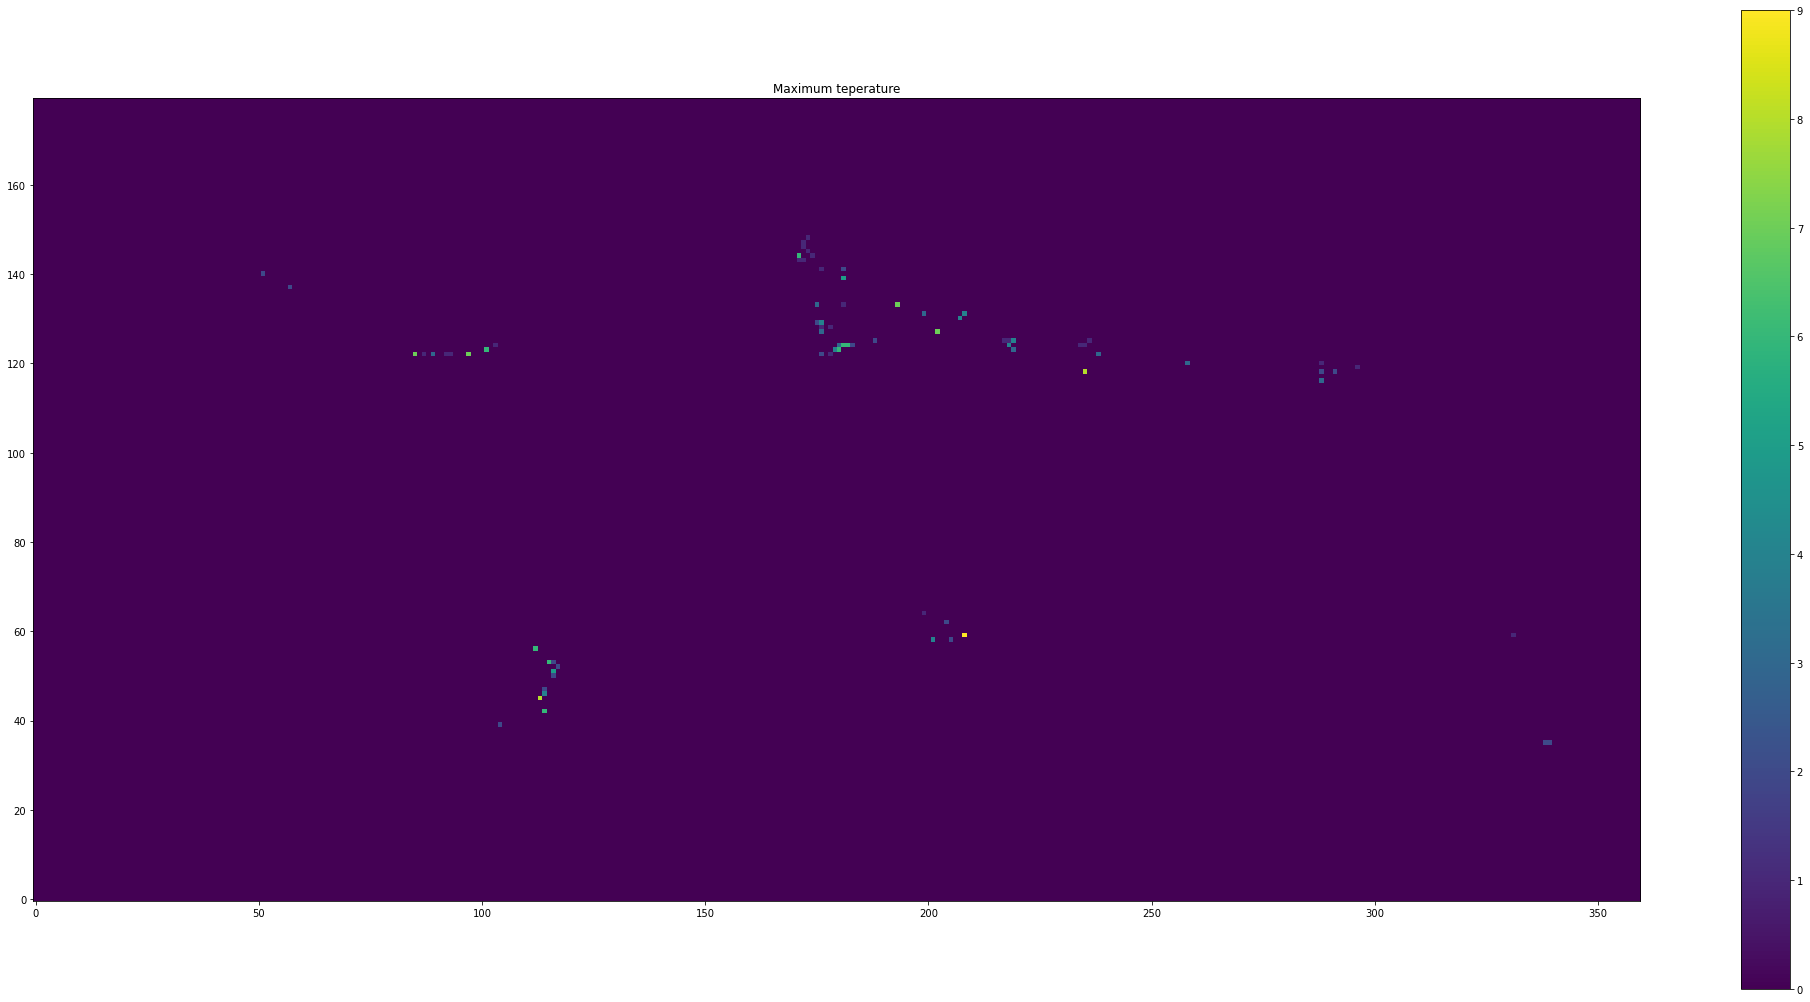

In [26]:
#ploting the data on map
pixel_plot = plt.figure()
pixel_plot.set_figwidth(36)
pixel_plot.set_figheight(18)
  
# plotting a plot
pixel_plot.add_axes()
  
# customizing plot
plt.title("Maximum teperature")
pixel_plot = plt.imshow(data2, origin='lower')
  
plt.colorbar(pixel_plot)
  
# save a plot
#plt.savefig('max_temp.png')
  
# show plot
plt.show(pixel_plot)

<ipython-input-27-1a209e665247>:7: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  pixel_plot.add_axes()


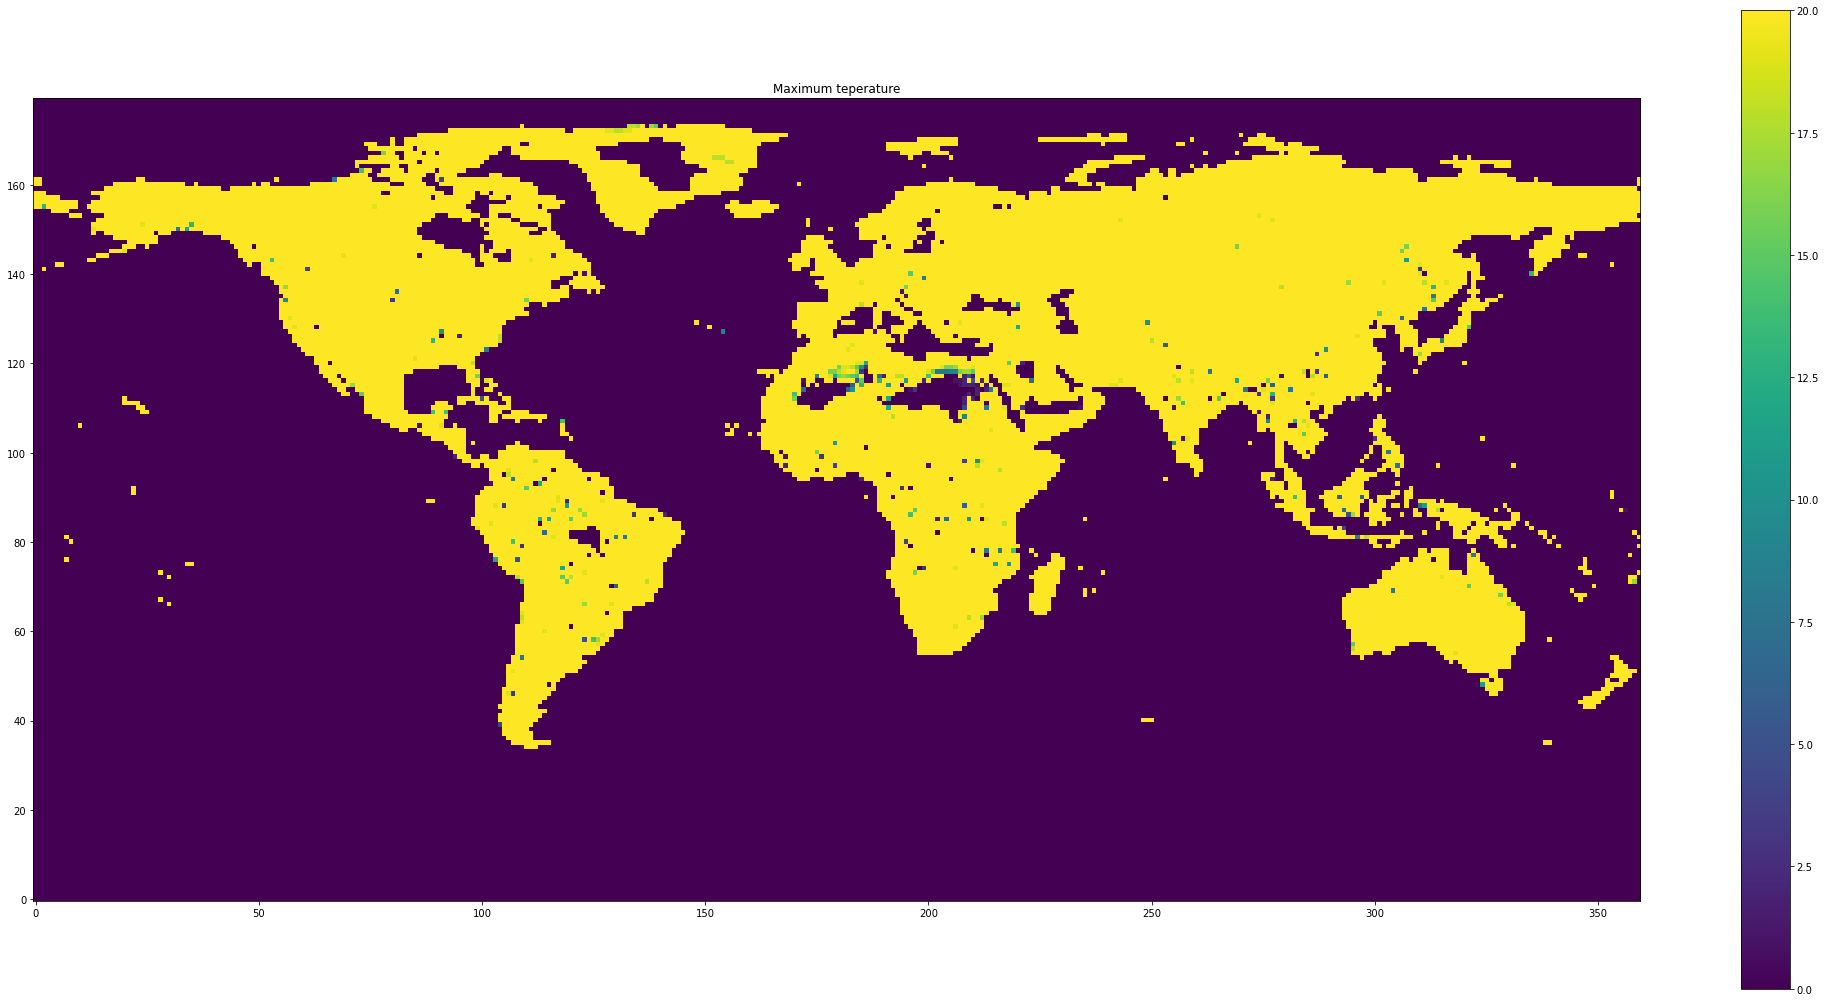

In [27]:
#ploting the data on map
pixel_plot = plt.figure()
pixel_plot.set_figwidth(36)
pixel_plot.set_figheight(18)
  
# plotting a plot
pixel_plot.add_axes()
  
# customizing plot
plt.title("Maximum teperature")
pixel_plot = plt.imshow(data3, origin='lower')
  
plt.colorbar(pixel_plot)
  
# save a plot
#plt.savefig('max_temp.png')
  
# show plot
plt.show(pixel_plot)